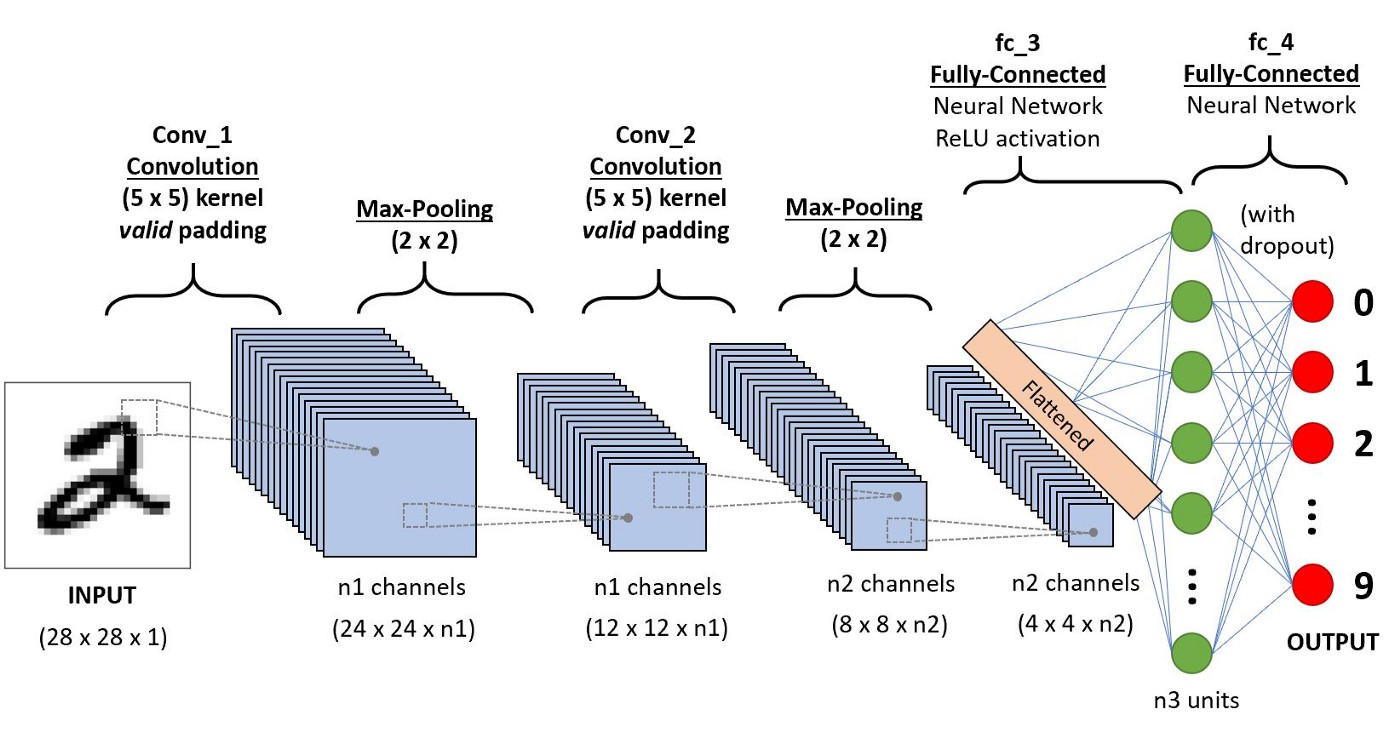

<h3>1. Loading packages:</h3>

In [71]:
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import Activation
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Softmax
from keras_cv.layers import Grayscale
import matplotlib.pyplot as plt
import numpy as np

<h3>2. Loading training and testing data:</h3>

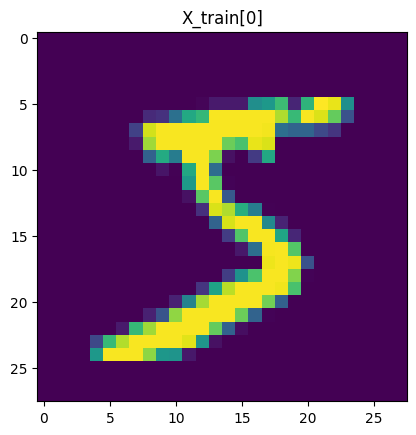

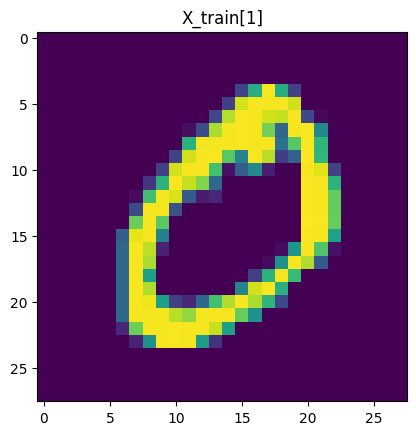

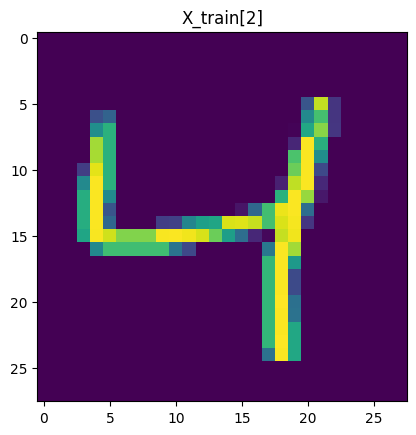

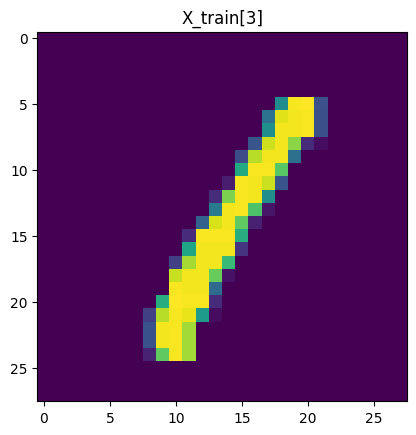

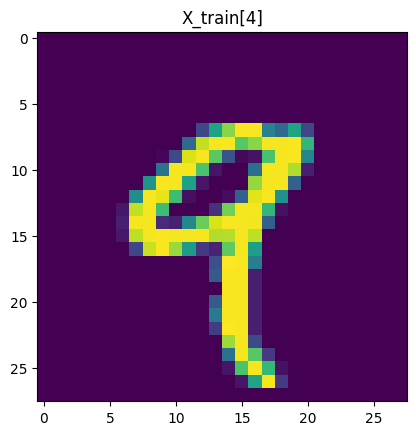

Size of X_train: 60000
Shape of X_train: (60000, 28, 28)
Size of y_train: 60000
Shape of y_train: (60000,)


In [72]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

for i in range(5):
    plt.imshow(X_train[i])
    plt.title(f"X_train[{i}]")
    plt.show()

print(f"Size of X_train: {len(X_train)}")
print(f"Shape of X_train: {X_train.shape}")
print(f"Size of y_train: {len(y_train)}")
print(f"Shape of y_train: {y_train.shape}")

<h3>3. Data preprocessing:</h3>

Shape of X_train: (60000, 28, 28, 1)
Shape of X_test: (10000, 28, 28, 1)


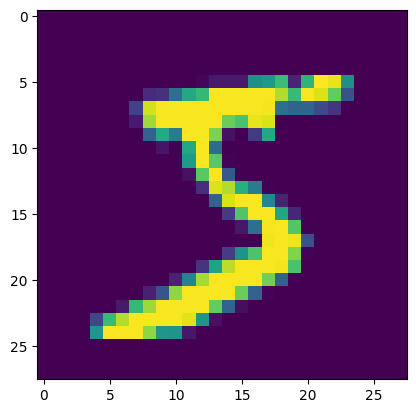

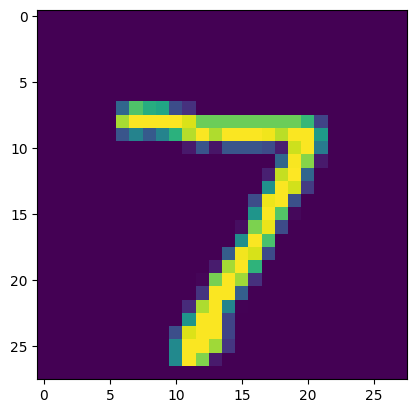

In [73]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")

plt.imshow(X_train[0])
plt.show()
plt.imshow(X_test[0])

In [74]:
for i in range(5):
    print(f"y_train[{i}]: \n{y_train[i]}")

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

for i in range(5):
    print(f"y_train[{i}]: {y_train[i]}")

y_train[0]: 
5
y_train[1]: 
0
y_train[2]: 
4
y_train[3]: 
1
y_train[4]: 
9
y_train[0]: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
y_train[1]: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
y_train[2]: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
y_train[3]: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
y_train[4]: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


<h3>4. Creating CNN model:</h3>

In [75]:
cnn_model = Sequential()
cnn_model.add(Convolution2D(
    64, kernel_size=3, input_shape=(28, 28, 1)
))
cnn_model.add(Activation(activation="relu"))
cnn_model.add(Convolution2D(
    32, kernel_size=3
))
cnn_model.add(Activation(activation="relu"))
cnn_model.add(Flatten())
cnn_model.add(Dense(10))
cnn_model.add(Softmax())

cnn_model.compile(
    optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy']
)

<h3>5. Training the CNN model:</h3>

In [76]:
cnn_model.fit(
    X_train, y_train, validation_data=(X_test, y_test), epochs=3
)

Epoch 1/3
1875/1875 [==============================] - 60s 32ms/step - loss: 0.1866 - accuracy: 0.9534 - val_loss: 0.0949 - val_accuracy: 0.9710
Epoch 2/3
1875/1875 [==============================] - 59s 32ms/step - loss: 0.0666 - accuracy: 0.9801 - val_loss: 0.0704 - val_accuracy: 0.9786
Epoch 3/3
1875/1875 [==============================] - 60s 32ms/step - loss: 0.0451 - accuracy: 0.9863 - val_loss: 0.0822 - val_accuracy: 0.9763


<h3>6. Making predictions: </h3>

1/1 [==============================] - 0s 74ms/step


Predicted 0: [6.2251513e-07 1.3571753e-12 1.3805808e-06 2.1300048e-05 2.4048594e-13
 3.8626102e-10 1.2174263e-14 9.9997652e-01 5.3275159e-08 9.5842346e-08], Max index: 7
Actual values 0: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.], Max index: 7
## Correct result! ##


Predicted 1: [7.5735738e-09 3.4464250e-07 9.9999619e-01 3.1716934e-09 1.6572554e-12
 1.2490039e-13 3.4692096e-06 8.4706852e-16 2.4198460e-10 5.9832375e-14], Max index: 2
Actual values 1: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.], Max index: 2
## Correct result! ##


Predicted 2: [1.6873852e-05 7.6380420e-01 9.5442208e-03 1.1522087e-05 4.5301914e-03
 3.3316921e-04 1.8816711e-05 3.0576883e-04 2.2142634e-01 8.8580227e-06], Max index: 1
Actual values 2: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.], Max index: 1
## Correct result! ##


Predicted 3: [9.9999869e-01 4.4647116e-12 8.4358987e-08 1.1920917e-11 5.7628036e-10
 3.8799786e-08 3.4061038e-08 1.2066607e-12 1.2174972e-07 1.0447732e-06], Max index: 0
Actua

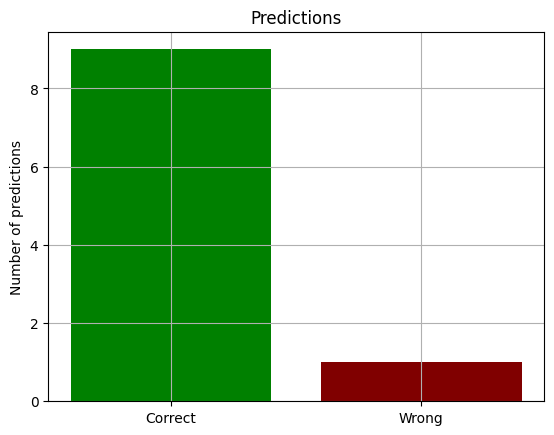

In [77]:
prediction = cnn_model.predict(X_test[:10])

correct_predictions = 0
wrong_predicitons = 0
total_number_of_predictions = len(prediction)
for i in range(len(prediction)):
    max_index_predicted = np.argmax(prediction[i])
    max_index_tested = np.argmax(y_test[i])
    print("\n")
    print(f"Predicted {i}: {prediction[i]}, Max index: {max_index_predicted}")
    print(f"Actual values {i}: {y_test[i]}, Max index: {max_index_tested}")
    if max_index_predicted == max_index_tested:
        correct_predictions+=1
        print("## Correct result! ##")
    else:
        wrong_predicitons+=1
        print("## Wrong result! ##")
        
data = {"Correct": correct_predictions, "Wrong": wrong_predicitons}
plt.bar(data.keys(), data.values(), color=["green", "maroon"])
plt.title("Predictions")
plt.grid(True)
plt.ylabel("Number of predictions")
plt.show()

1/1 [==============================] - 0s 20ms/step
[[1.2340236e-10 2.9941328e-04 7.8952708e-04 9.4578457e-01 4.1799832e-02
  1.2478426e-06 8.1762895e-03 3.1490647e-03 5.3031207e-10 8.1822008e-11]]
Argmax: 2


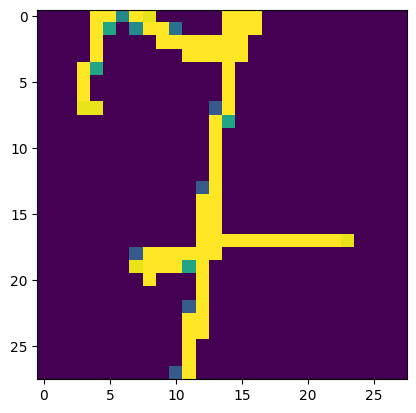

In [92]:
cnn_model.save("digits_cnn_model.keras")
cnn_model.save_weights("digits_cnn_model_weights.h5")
number_of_channels=1

from PIL import ImageChops
from keras.models import load_model
from keras.preprocessing.image import load_img

image = load_img("./letters/7.png", target_size=(28, 28), grayscale=True)
image = ImageChops.invert(image)
plt.imshow(image)
img = np.array(image)
img = img.reshape(1, 28, 28, 1)
output_label = cnn_model.predict(img)
print(f"{output_label}")
print(f"Argmax: {np.argmax(output_label)-1}")